<a href="https://colab.research.google.com/github/hrs9616/Misc.-scripts/blob/main/CN%2B_GRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

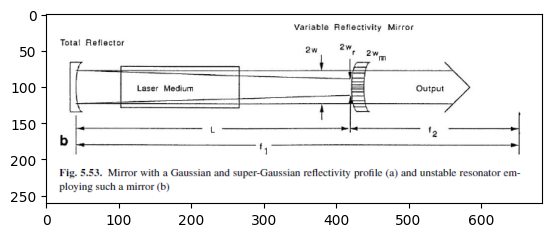

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageChops

# From Koechner, sec. 5.5
img1 = Image.open(r"/content/drive/MyDrive/Colab Notebooks/GRMs/GRMs.png")

plt.imshow(img1)

# <span style='font-size:large'>GRM Analysis for CN\+</span>



In [207]:
# NdYAG properties

# wavelength
wavelength = 1064 *10**(-9)

# index, 1% at.wt.
nYAG = 1.8197

# length of slab
l = 42                   # millimeters
s = 3.5

In [208]:
# CN+ stable resonator properties

# resonator length
L = 321.25               # millimeters
# does not consider n > 1 for optical thicknesses
L = 330
# approx. considering optical thicknesses

# R1 is the OC, R2 is the HR.

# Stable OC reflectivity
R1_stable = 0.3
# HR reflectivity
R2 = 1

# From Koechner, p. 104
g0 = -(1 / (2 * l)) * np.log(R1_stable)
print("g0L = ", g0 * L)

# M2 (a guess for now)
M2 = 20

g0L =  4.729893159851891


In [209]:
# GRM design procedure from Koechner, p. 292

# From Ropt for stable cavity
Reff = R1_stable

# Desired spot size radius of Gaussian beam
w = 0.5 * (s /2)

# For GRM design
m = 1 / (R1_stable)**(1/4)
Rmax = 1 / m**2
# For TEM00
#m = (R0 / Reff)**(1/2)
#Rmax = Reff * m**2
# For TEM01
#m = (R0 / Reff)**(1/4)
#Rmax = Reff * m**4
print("m = ", m)
print("Rmax = ", Rmax)

# GRM spot size
wM = w / np.sqrt(m**2 - 1)
print("wM = ", wM)

# OC ROC
R1_ROC = -2 * L / (m-1)
print("OC_ROC = ", R1_ROC)

# HR ROC
R2_ROC = -m * R1_ROC
print("HR_ROC = ", R2_ROC, "mm")
print("")

# Mirror focal lengths
f1 = -R1_ROC / 2
f2 = f1 + L
print("Mirror focal lengths:")
print("f1 = ", f1, "mm")
print("f2 = ", f2, "mm")

# Rod thermal lens
f = 1 / ((1 / R2_ROC) - (1 / Reff))
print("Thermal lens, f = ", f)


m =  1.3512001548070345
Rmax =  0.5477225575051661
wM =  0.9629104565177777
OC_ROC =  -1879.2702422430148
HR_ROC =  2539.2702422430148 mm

Mirror focal lengths:
f1 =  939.6351211215074 mm
f2 =  1269.6351211215074 mm
Thermal lens, f =  -0.3000354474418418


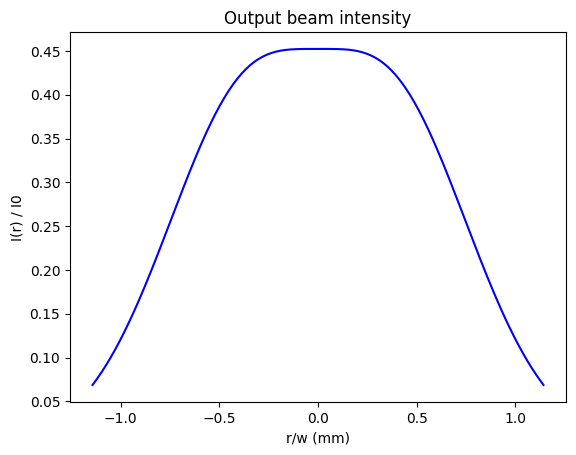

In [210]:
# Output intensity
I0 = 1
r = np.linspace(-1, 1, 200)
Iout = (1 - Rmax * np.exp(-2 * ( r / wM)**2))  * I0 * np.exp(-2 * ( r / w)**2)

#plot beam intensity profile
plt.xlabel("r/w (mm)")
plt.ylabel("I(r) / I0")
plt.plot(r/w, Iout/I0, label=None, color='blue', linestyle='-')
plt.title("Output beam intensity")
plt.show()

In [211]:
# GRM specs

# PN Custom GRM
R0 = 0.4
wM_GRM = 1.15             # millimeters
N = 6
R1_ROC_GRM = 1000          # millimeters

# PN 93001008
#R0 = 0.3
#wM_GRM = 0.85                 # millimeters
#N = 6
#R1_ROC_GRM = 749.3         # millimeters

# PN 93001020
#R0 = 0.3
#wM_GRM = 2.15                 # millimeters
#N = 2.4
#R1_ROC_GRM = 3000         # millimeters


In [212]:
# For available GRM specs.

# From GRM max. reflectivity
m = np.sqrt(R0 / Reff)
print("m = ", m)

# GRM spot size
wM = wM_GRM
print("wM = ", wM)
print("")

# For available GRM
R1_ROC = R1_ROC_GRM
print("OC_ROC = ", R1_ROC)

# HR ROC
R2_ROC = -m * R1_ROC
print("HR_ROC = ", R2_ROC, "mm")
print("")

# Mirror focal lengths
f1 = -R1_ROC / 2
f2 = f1 + L
print("Mirror focal lengths:")
print("f1 = ", f1, "mm")
print("f2 = ", f2, "mm")

# Rod thermal lens
f = 1 / ((1 / R2_ROC) - (1 / Reff))
print("Thermal lens, f = ", f)


m =  1.1547005383792517
wM =  1.15

OC_ROC =  1000
HR_ROC =  -1154.7005383792516 mm

Mirror focal lengths:
f1 =  -500.0 mm
f2 =  -170.0 mm
Thermal lens, f =  -0.29992207795839965


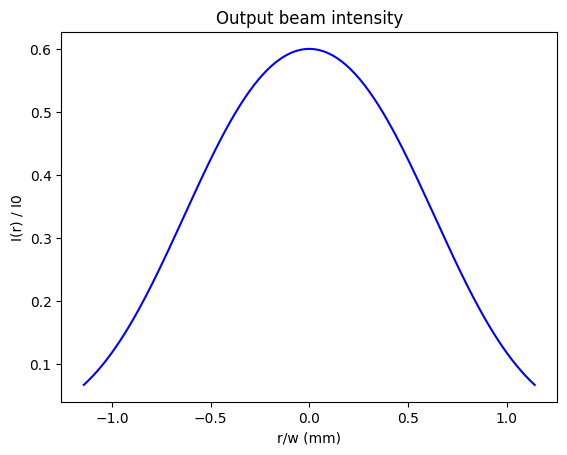

In [213]:
# Output intensity
I0 = 1
r = np.linspace(-1, 1, 200)
Iout = (1 - R0 * np.exp(-2 * ( r / wM)**2))  * I0 * np.exp(-2 * ( r / w)**2)

#plot beam intensity profile
plt.xlabel("r/w (mm)")
plt.ylabel("I(r) / I0")
plt.plot(r/w, Iout/I0, label=None, color='blue', linestyle='-')
plt.title("Output beam intensity")
plt.show()


In [214]:
# Addn. GRM equations

# From Koechner, sec. 5.5
# m = np.sqrt(1 + (w / wM)**2)
# R = Rmax * np.exp(-2*(r / wM)**2)

# For confocal resonator, verify resonator stability eqn.
print("Resonator stability for confocal cavity: 2L = R1_ROC + R2_ROC")
print("R1_ROC + R2_ROC = ", '%.4g' % (R1_ROC + R2_ROC))
print("2L = ", 2*L)

# From Joe's GRM worksheet
# w = s / 2
# wM = w / m

# Rod thermal lens is approx. 10m (from Justin T. calc. Oscillators and Amplifiers).


Resonator stability for confocal cavity: 2L = R1_ROC + R2_ROC
R1_ROC + R2_ROC =  -154.7
2L =  660
